In [1]:
%load_ext autoreload
%autoreload 2

## Cross Neutralizing

In [2]:
import utils

In [3]:
# NOTE: Change these accordingly
TASKS = ["DEP", "POS"]
TREE_BANKS = ["en_gum", "it_vit", "el_gdt"]
MODELS = ["xlm-roberta-base"]
# Set the values to None if you want to keep all the tags
KEEP_TAGS = {
    "POS": None,
    # "POS": ["NOUN", "ADJ", "VERB", "PRON", "DET", "NUM", "ADV", "AUX"],
    "DEP": None,
    # "DEP": ["PUNCT", "NSUBJ", "OBJ", "OBL", "ADVCL", "CASE", "DET", "AMOD"],
}

In [4]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

sns.set_style("white")
sns.set_context("paper", font_scale=0.8)

In [5]:
TEXTWIDTH = 6.30045
COLWIDTH = 3.03209

In [6]:
def plot_heatmap(df, save_name=None, vmin=None, vmax=None, center=0.0, cbar=True):
    bold = {"weight": "bold"}

    plt.figure(figsize=(TEXTWIDTH, TEXTWIDTH), dpi=300)
    cmap = sns.diverging_palette(20, 145, as_cmap=True)
    ax = sns.heatmap(
        df * 100,
        annot=True,
        fmt=".0f",
        cmap=cmap,
        cbar=cbar,
        vmin=vmin,
        vmax=vmax,
        center=center,
        square=True,
        cbar_kws={"shrink": 0.75},
        annot_kws={"fontsize": 7},
        # annot_kws={"size": 80 / np.sqrt(len(df))},
    )
    ax.set_xlabel(ax.get_xlabel(), fontdict=bold)
    ax.set_ylabel(ax.get_ylabel(), fontdict=bold)

    if save_name:
        plt.savefig(save_name, bbox_inches='tight')

DEP xlm-roberta-base en_gum
DEP xlm-roberta-base it_vit
DEP xlm-roberta-base el_gdt
POS xlm-roberta-base en_gum
POS xlm-roberta-base it_vit
POS xlm-roberta-base el_gdt


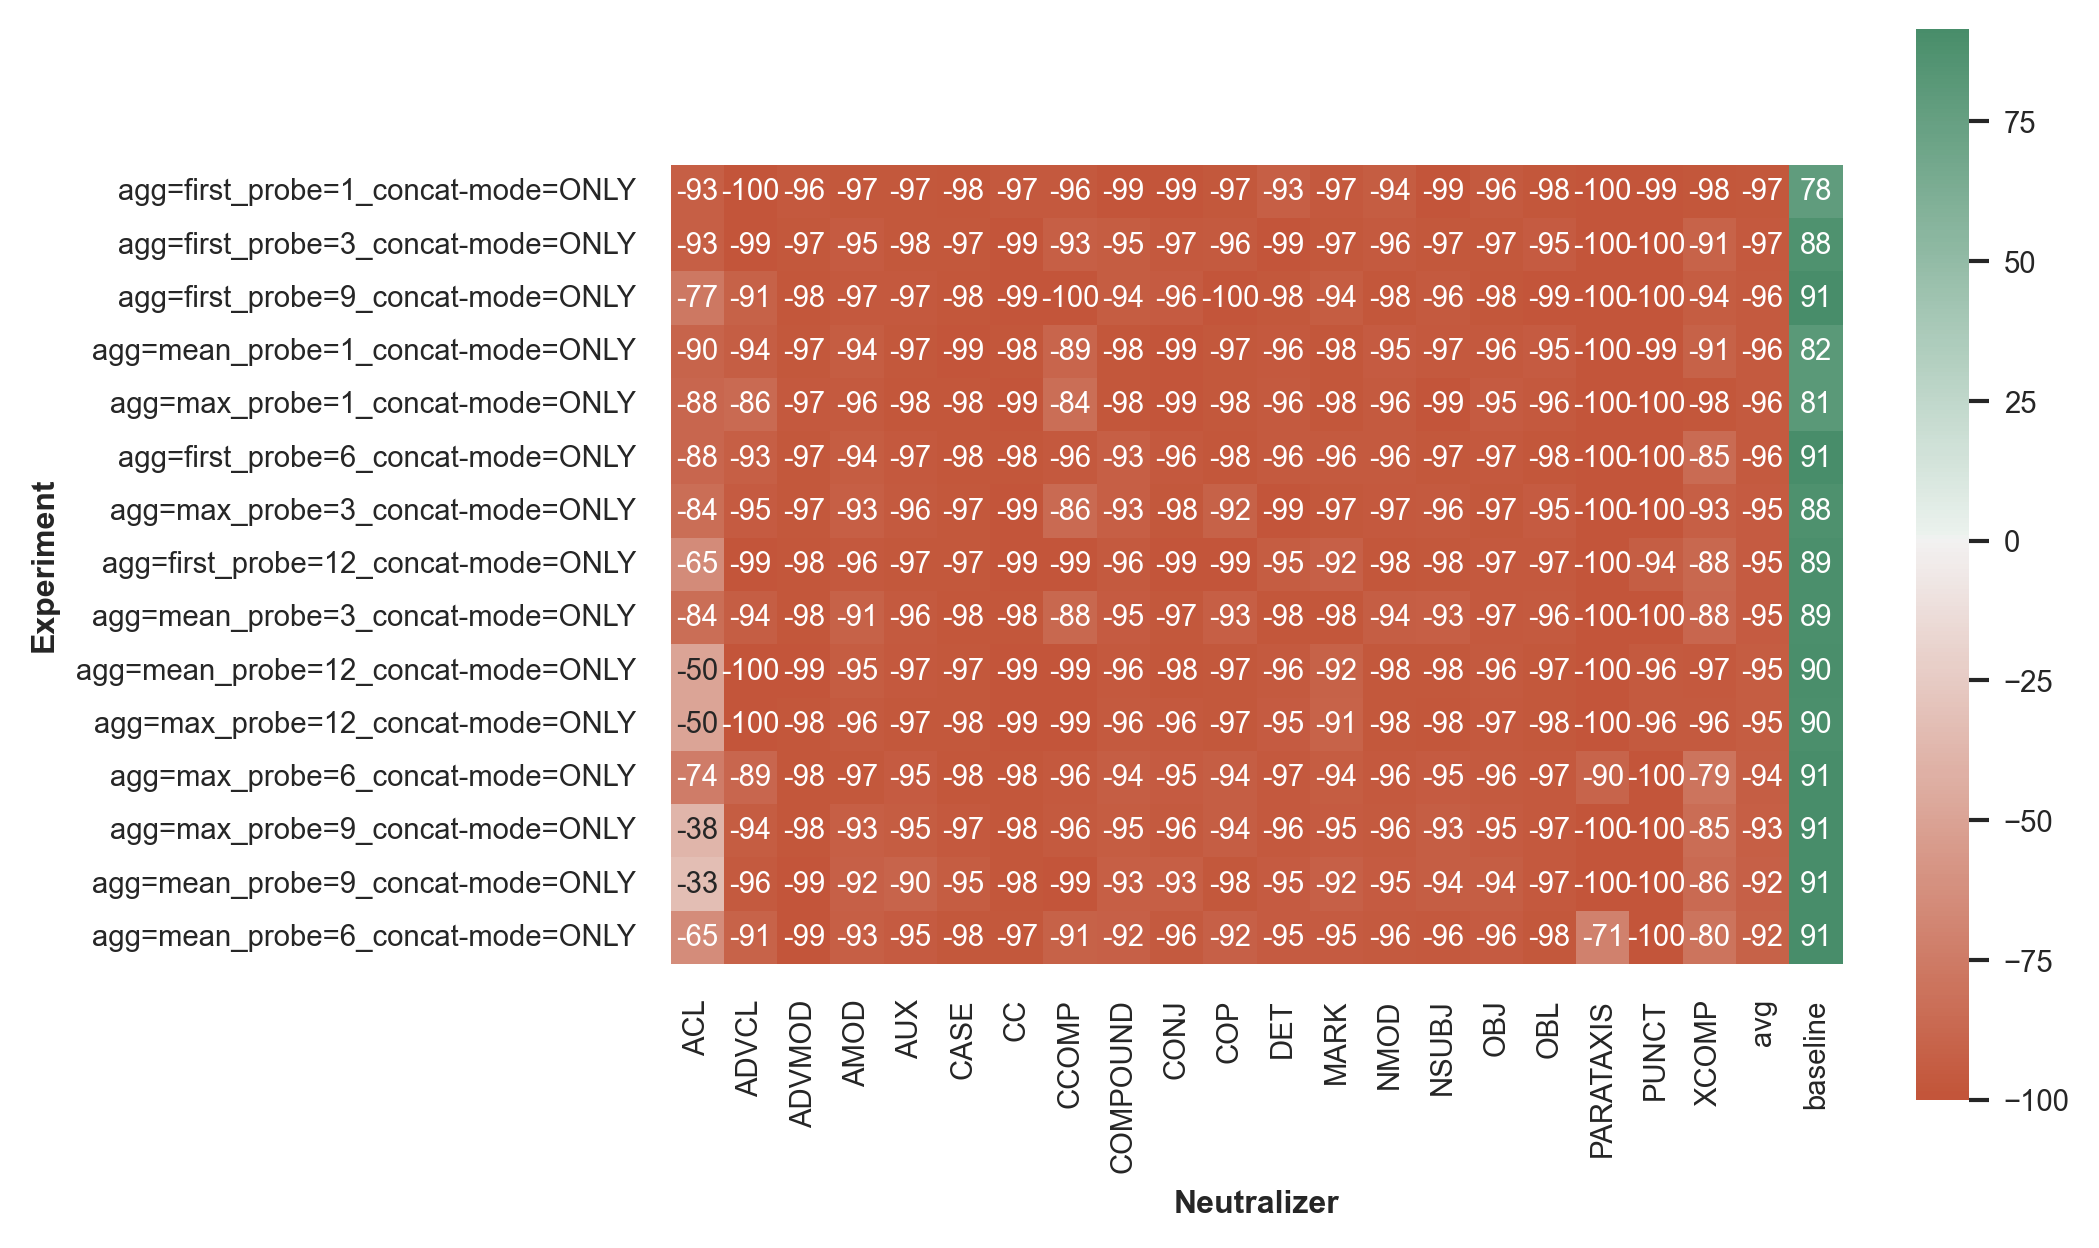

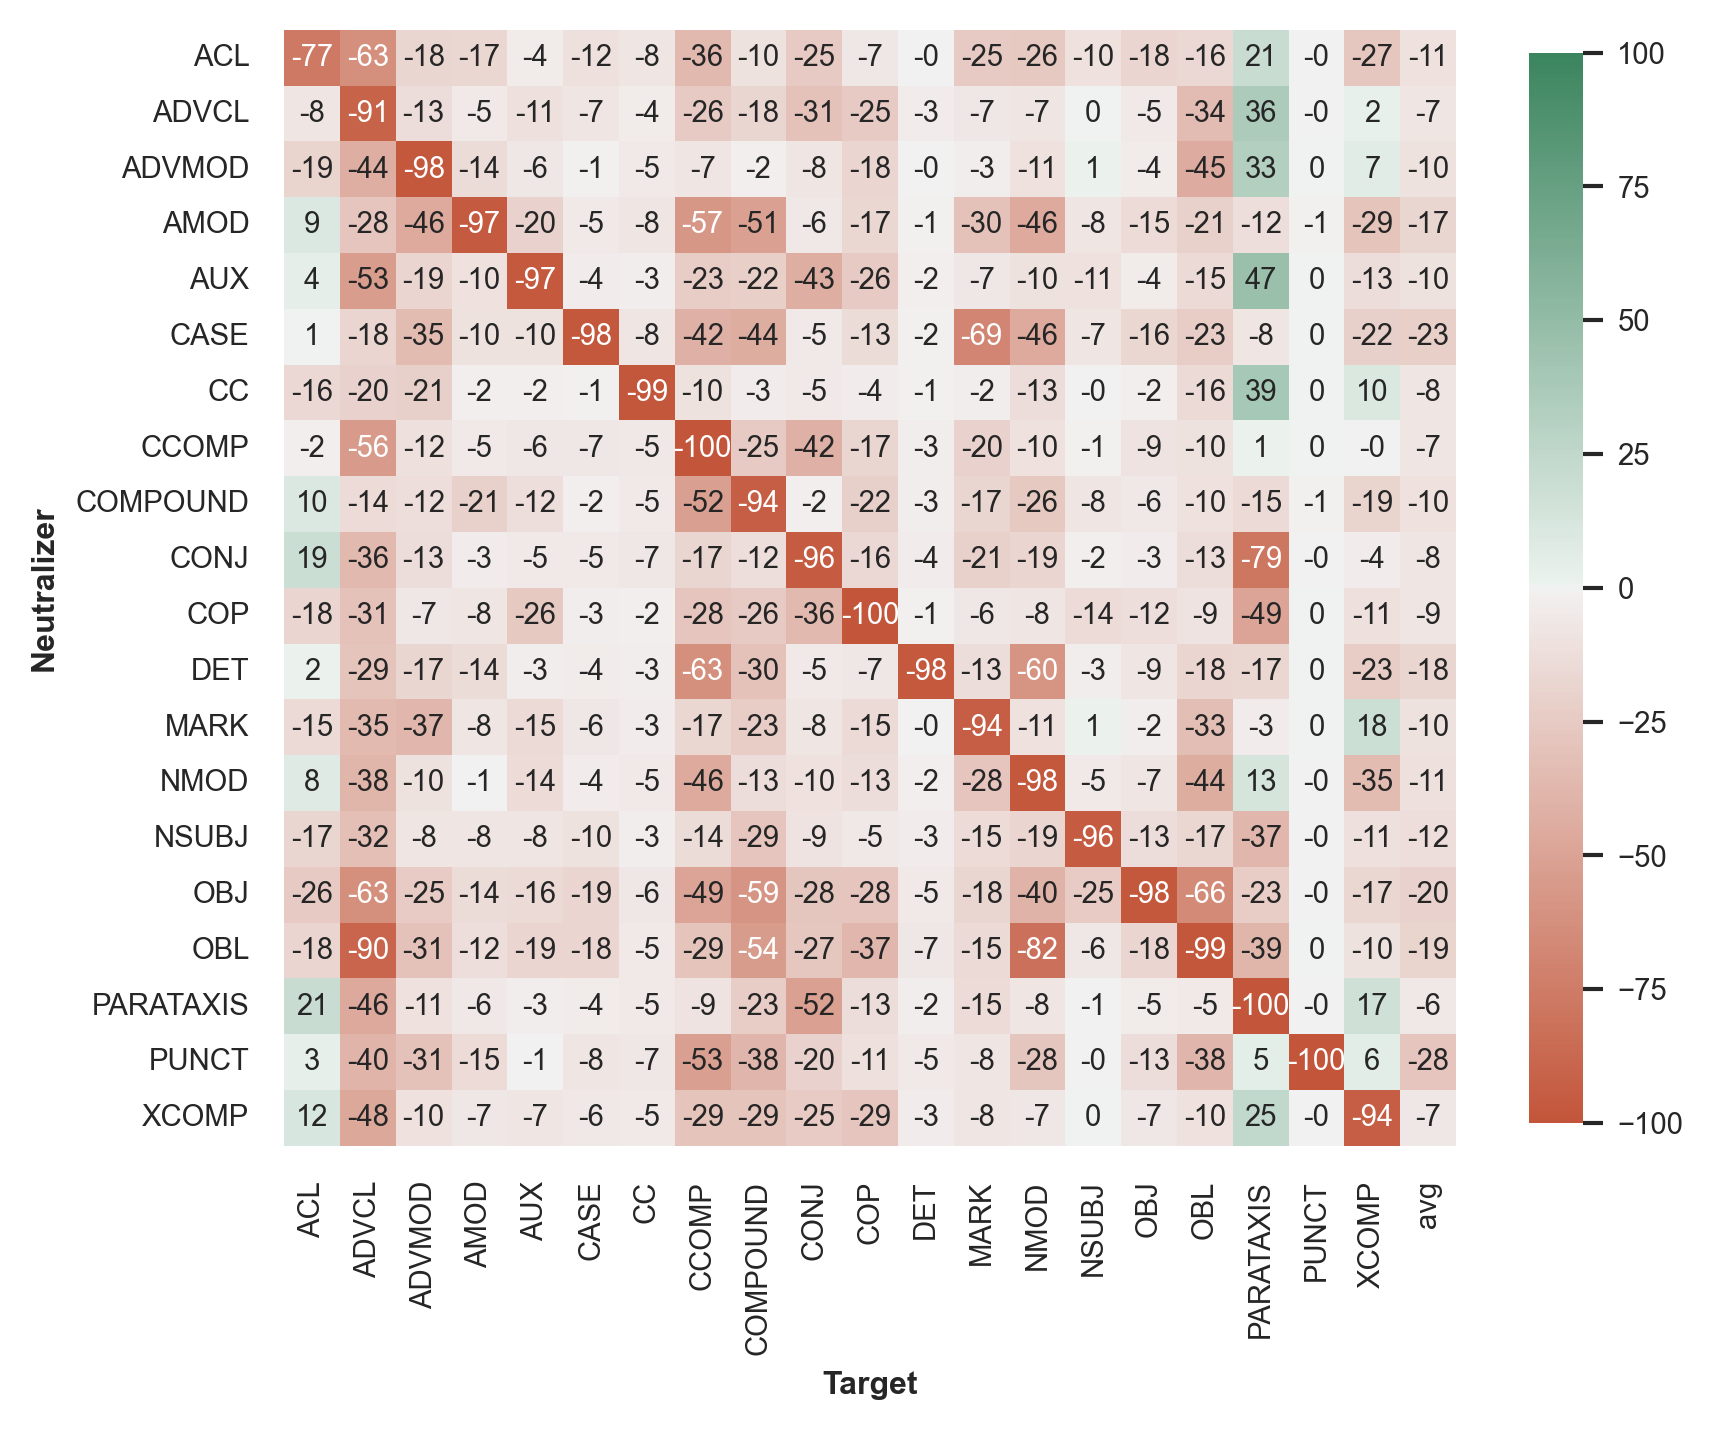

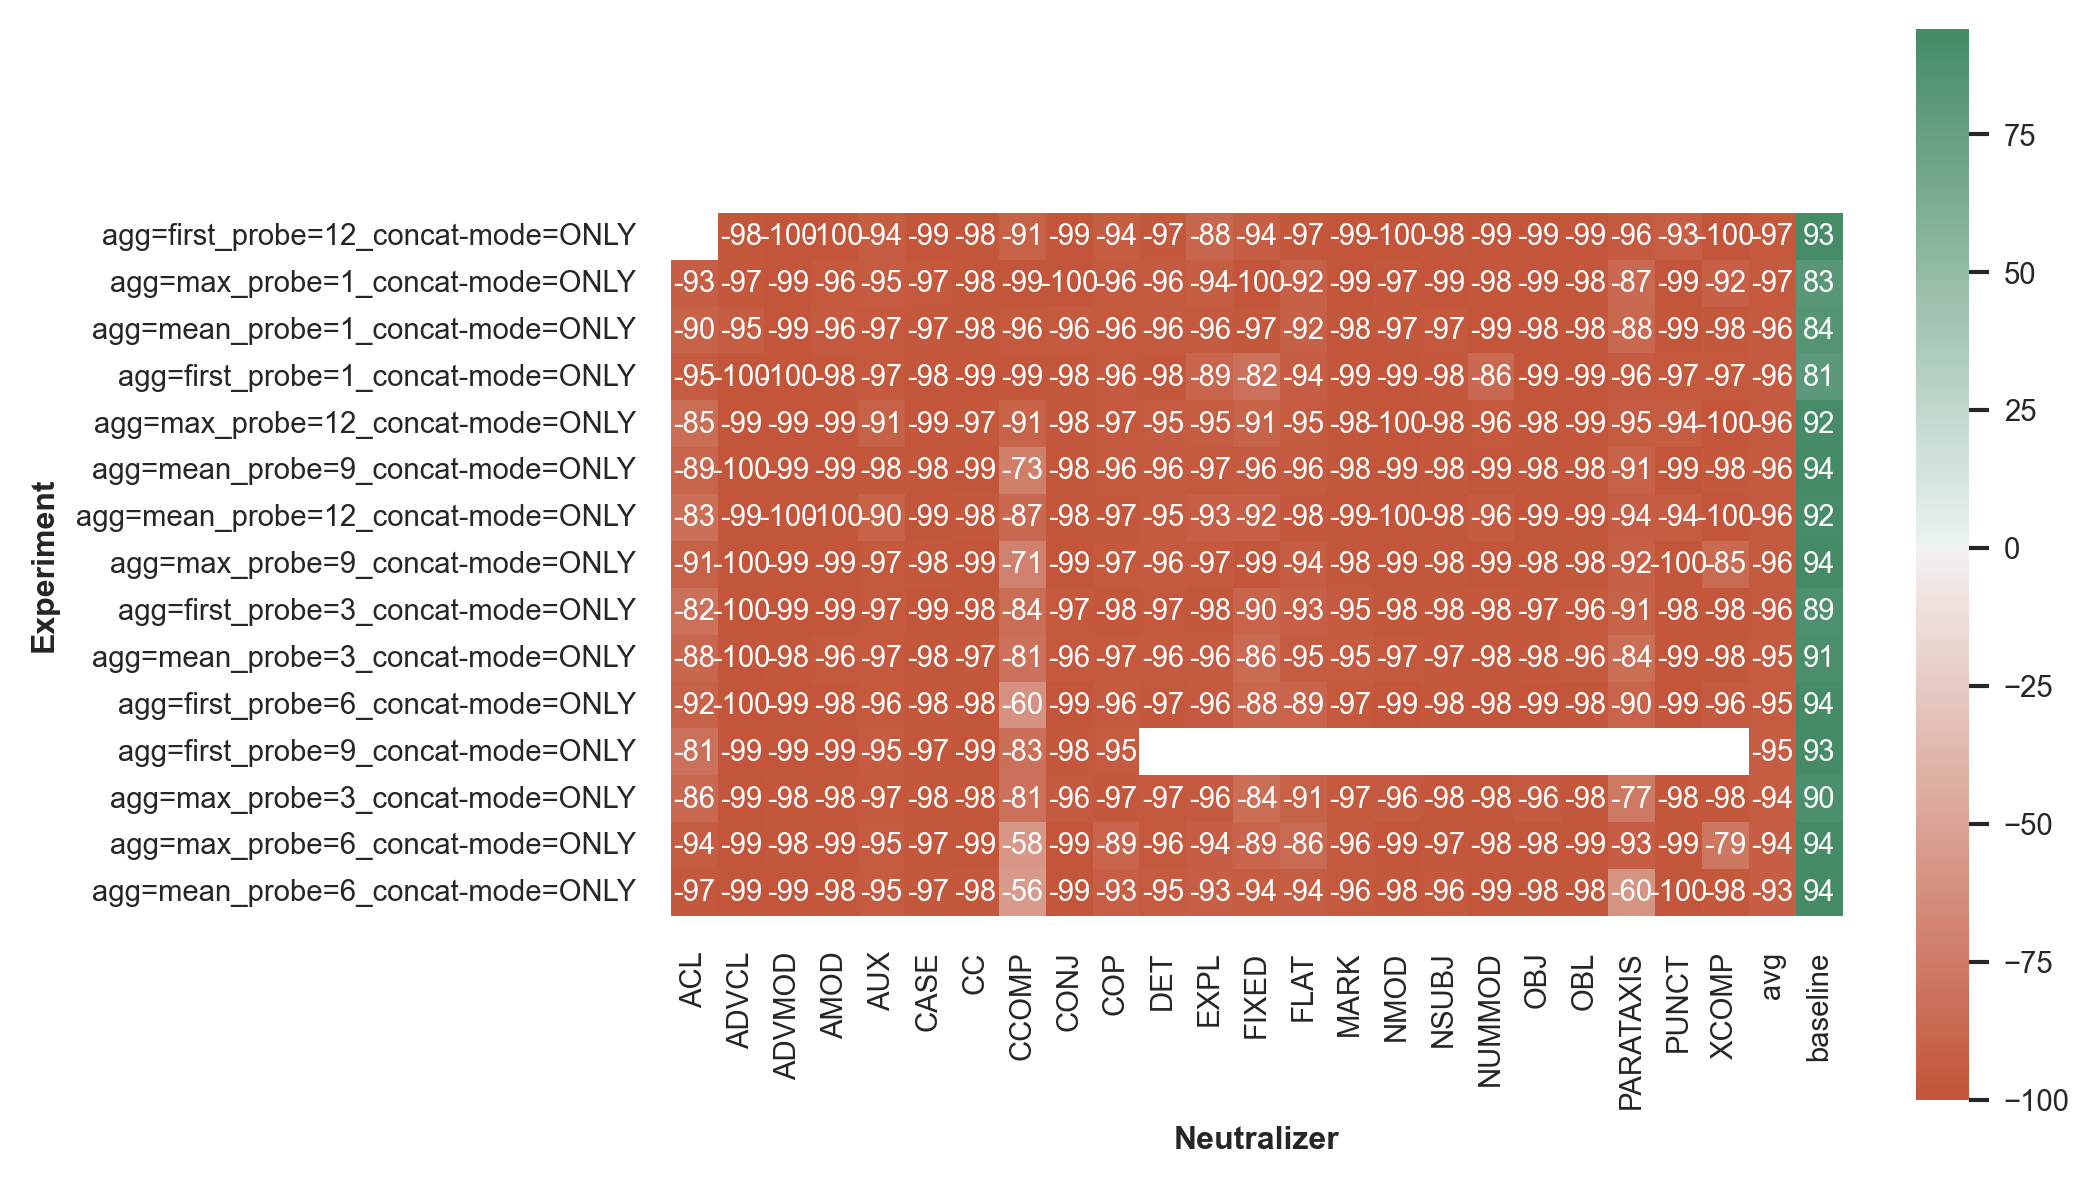

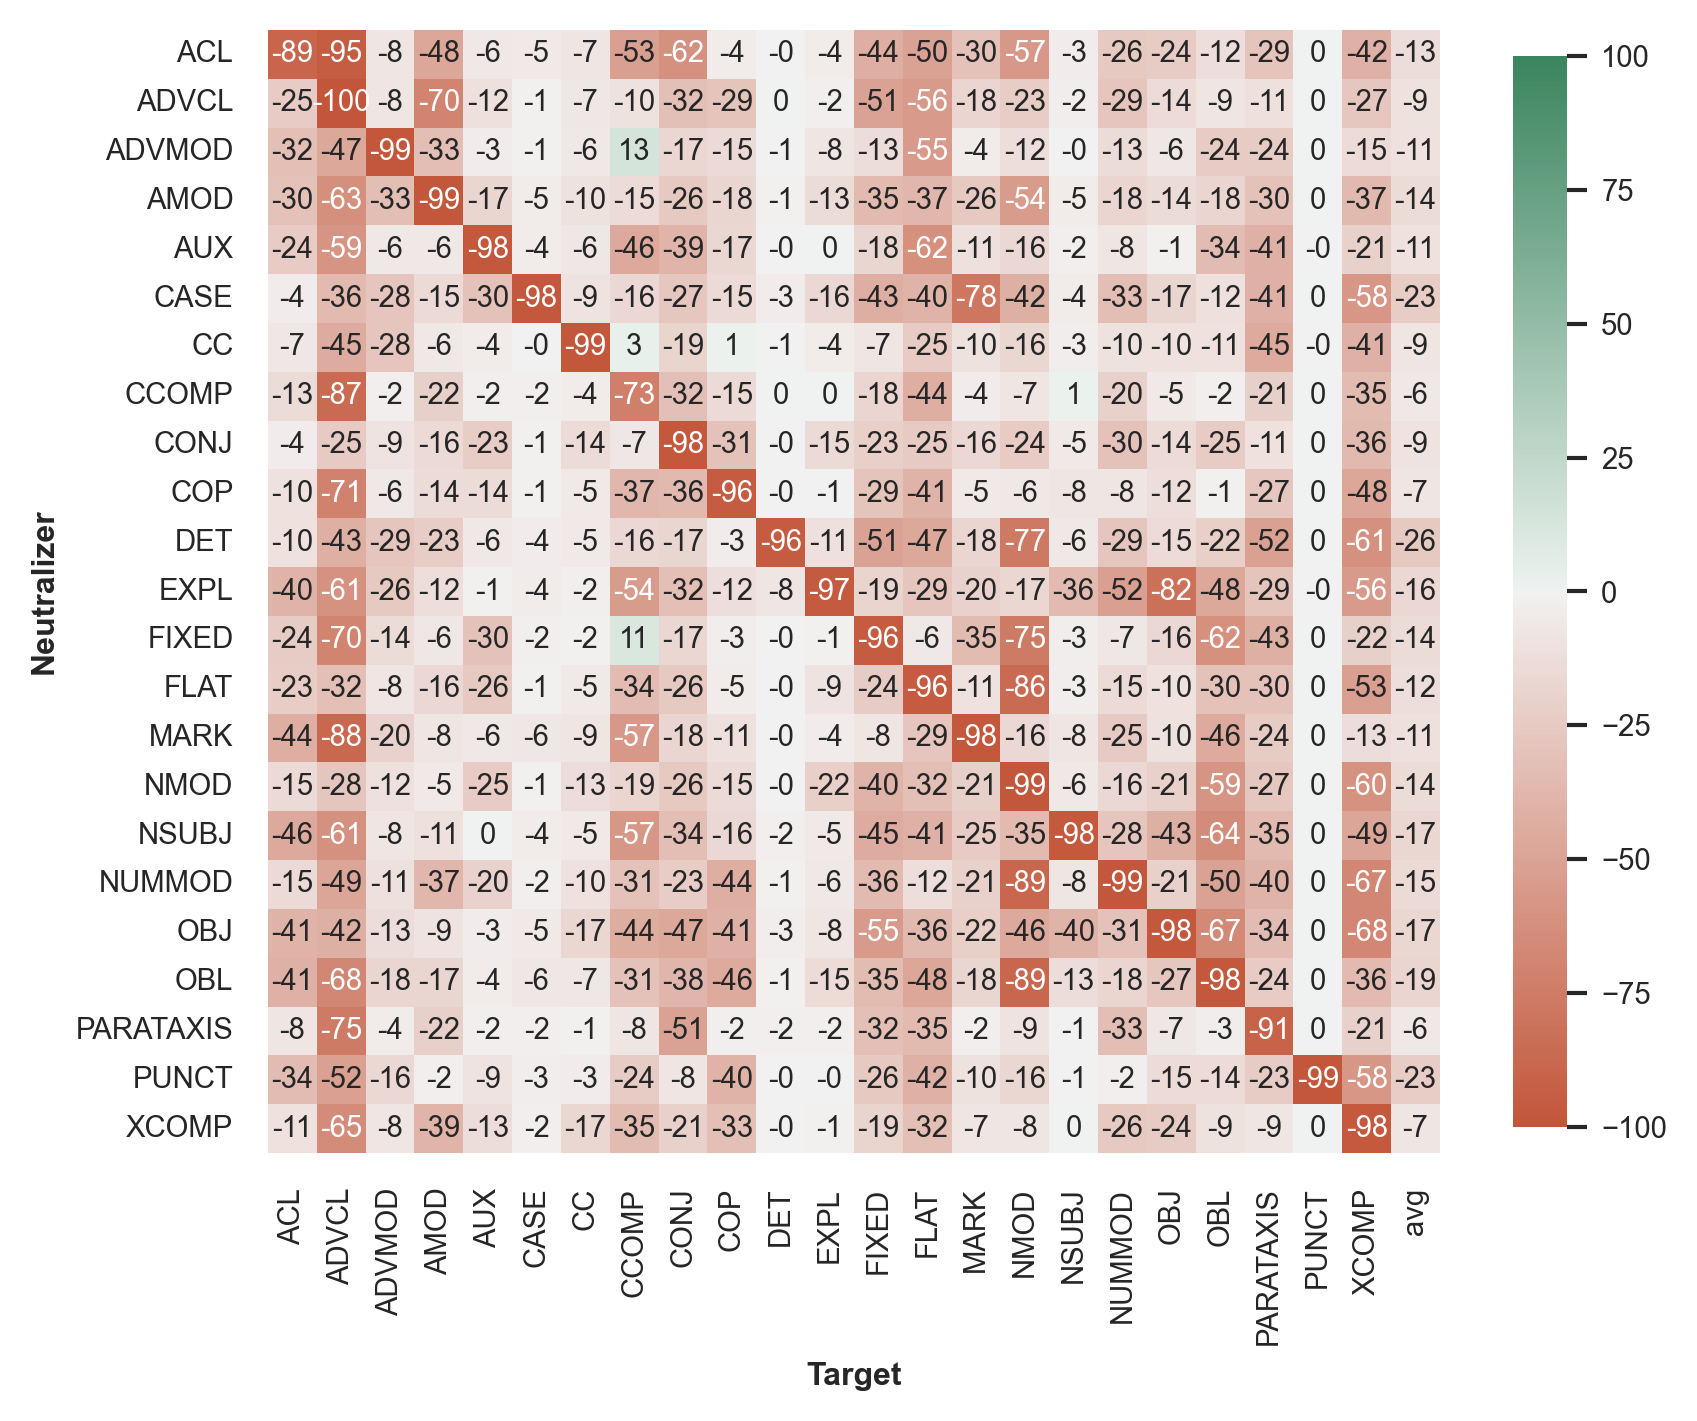

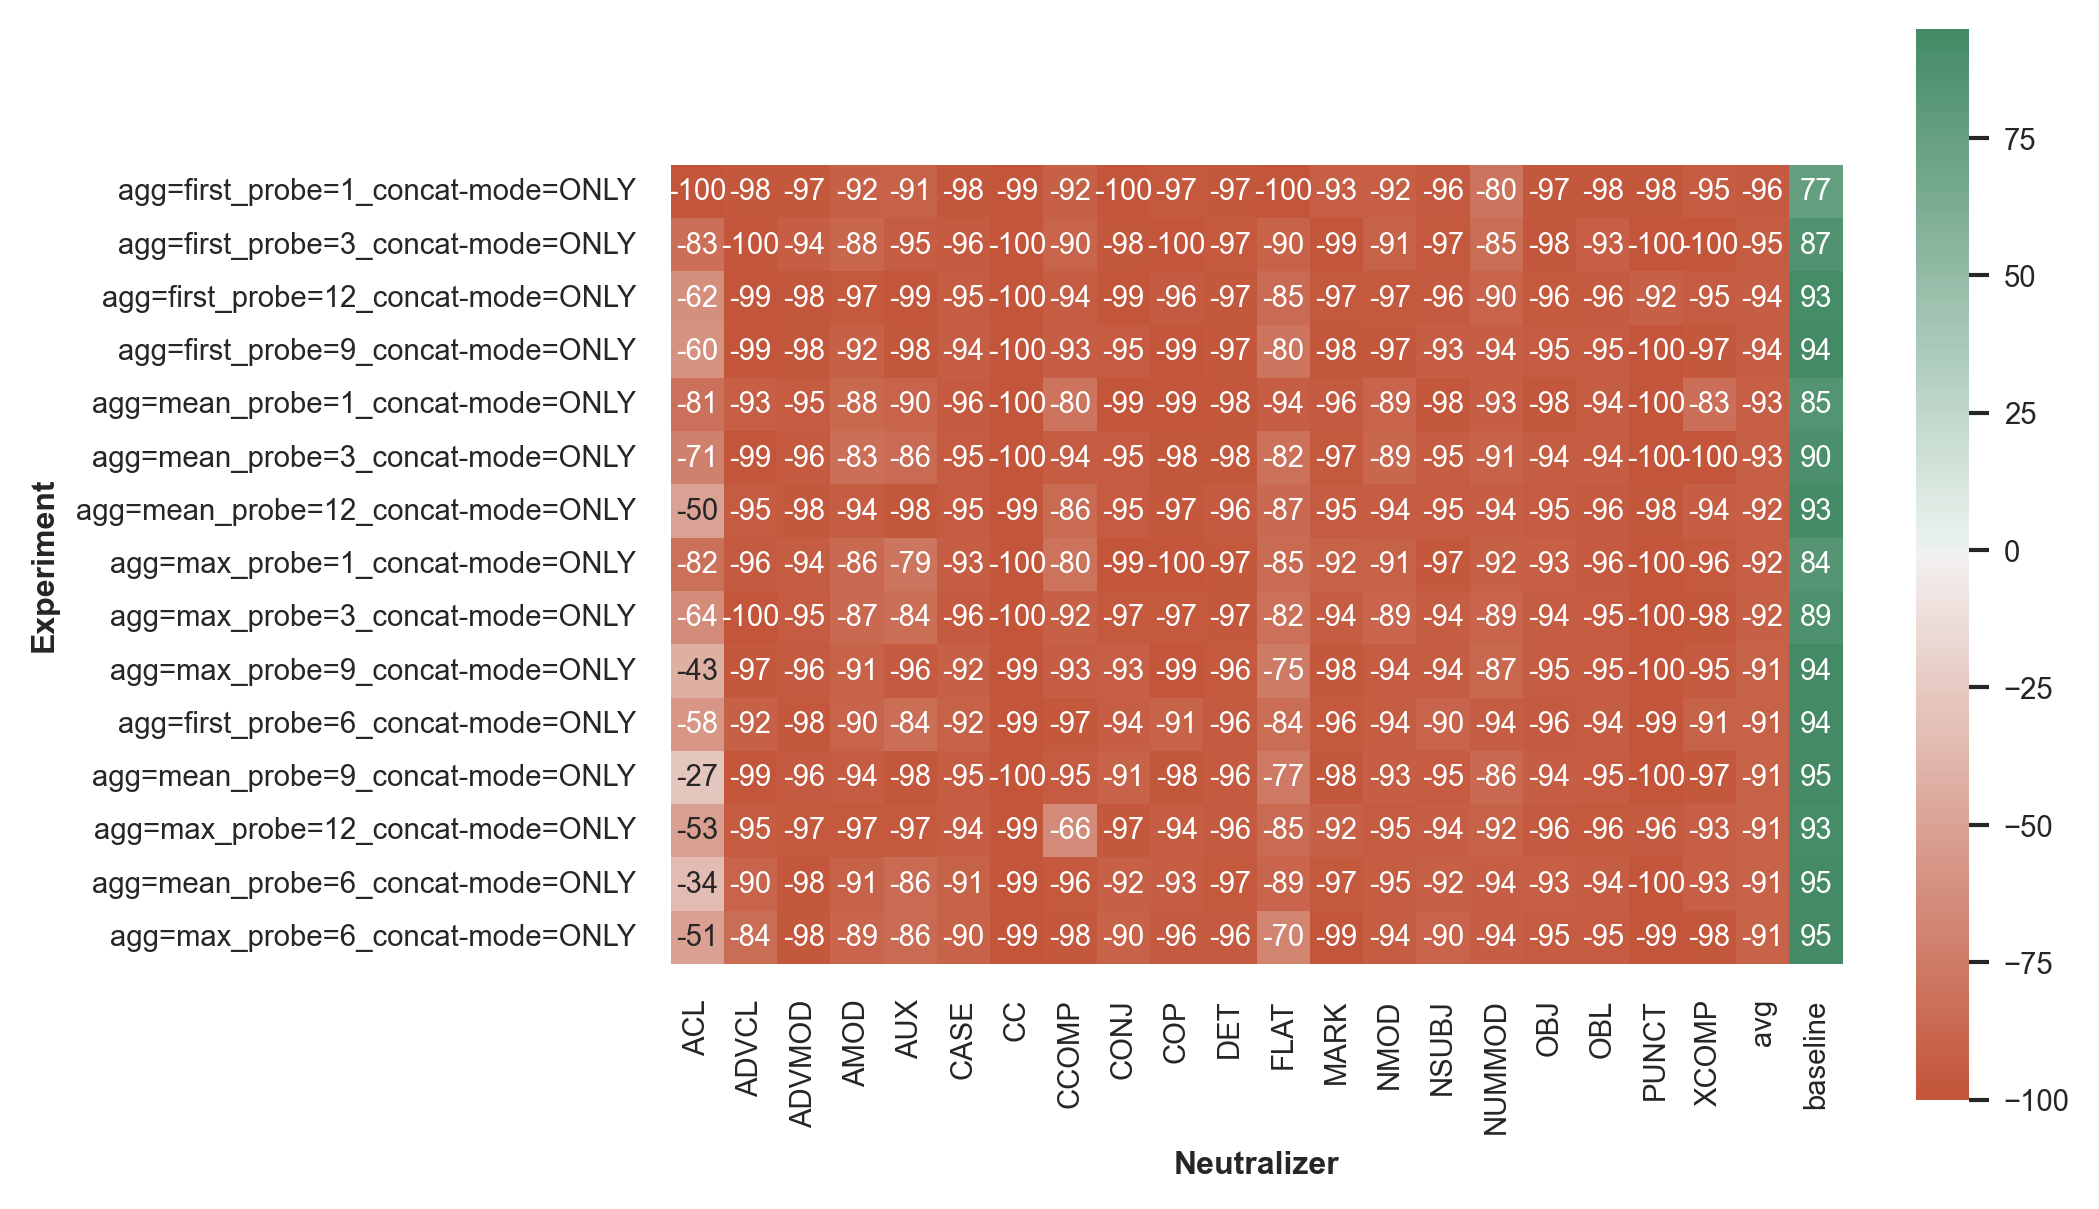

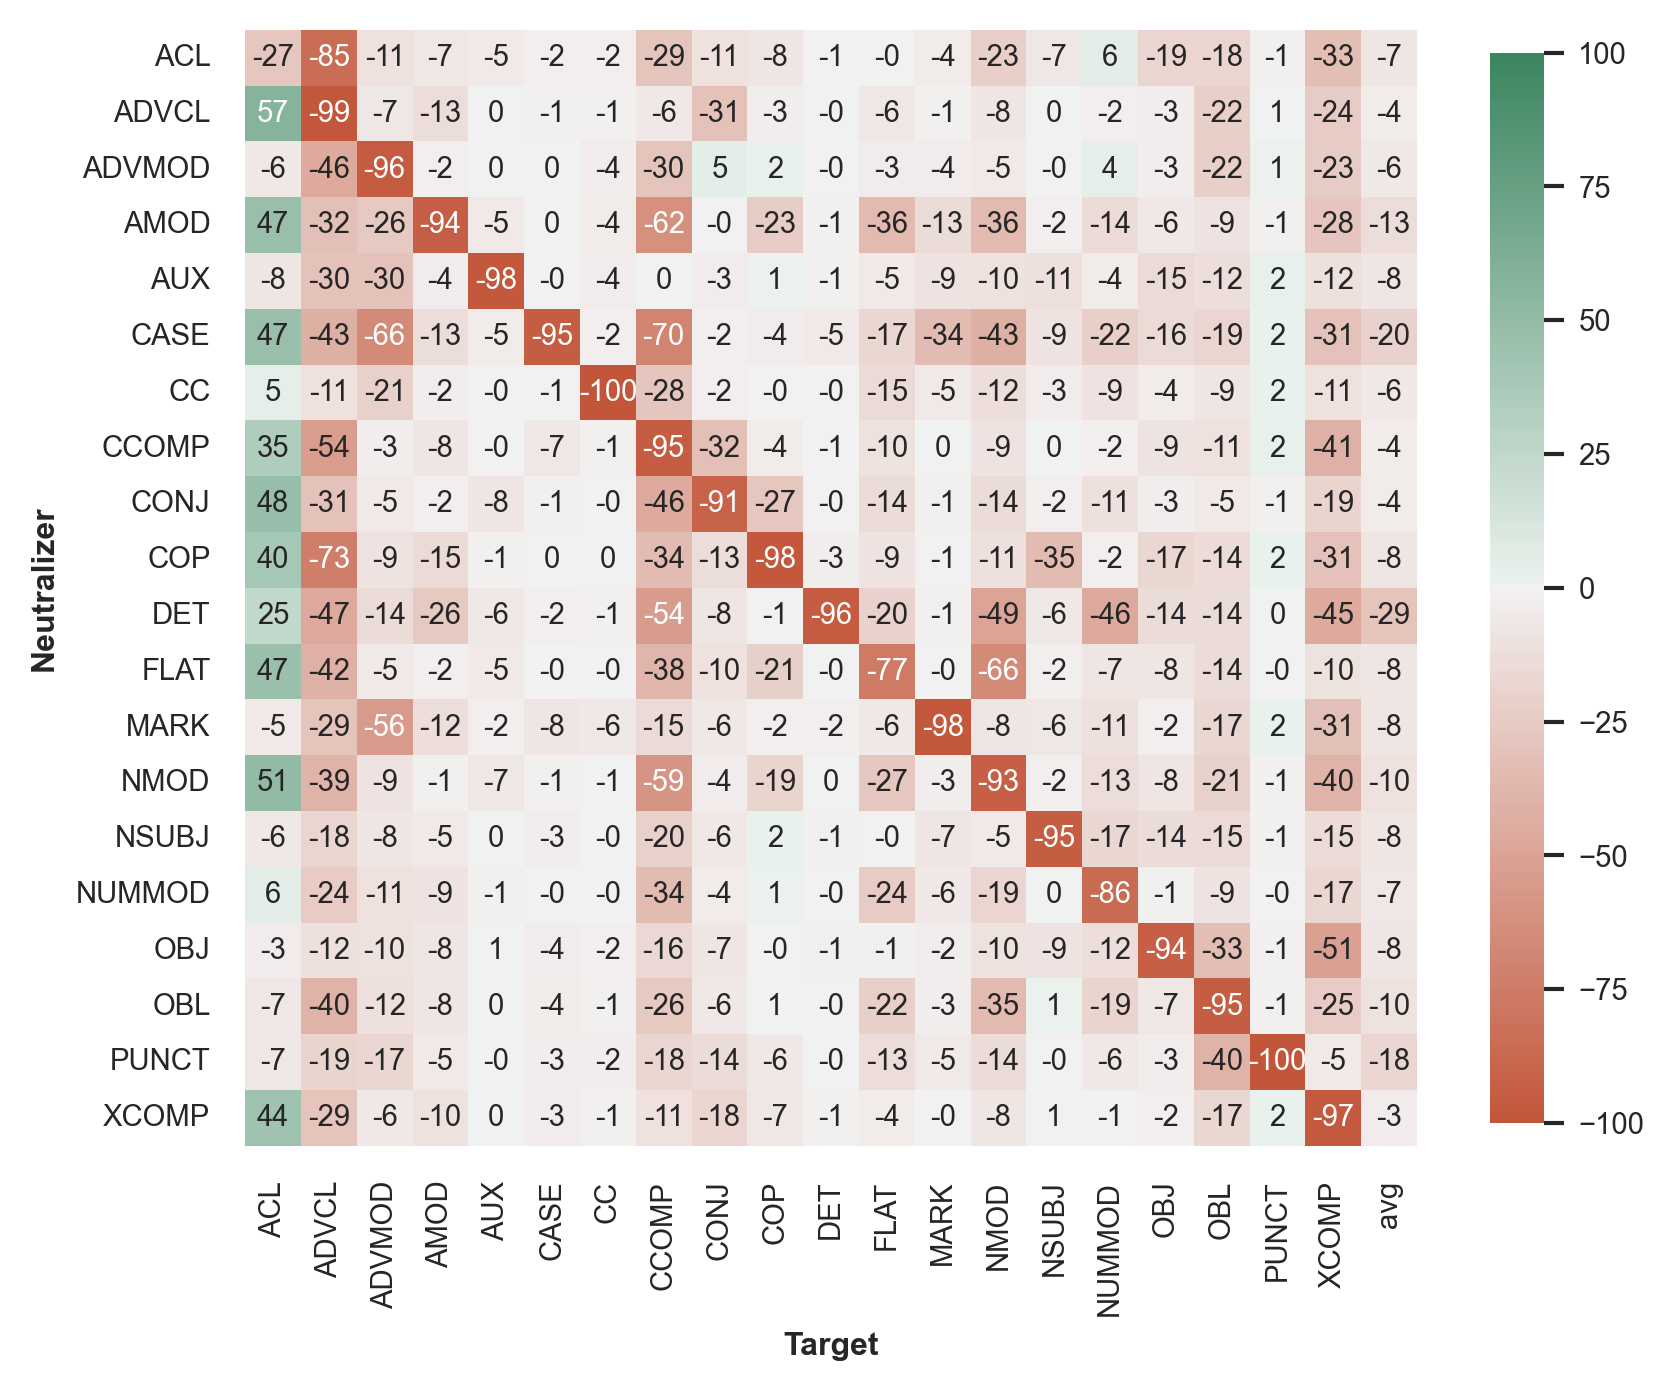

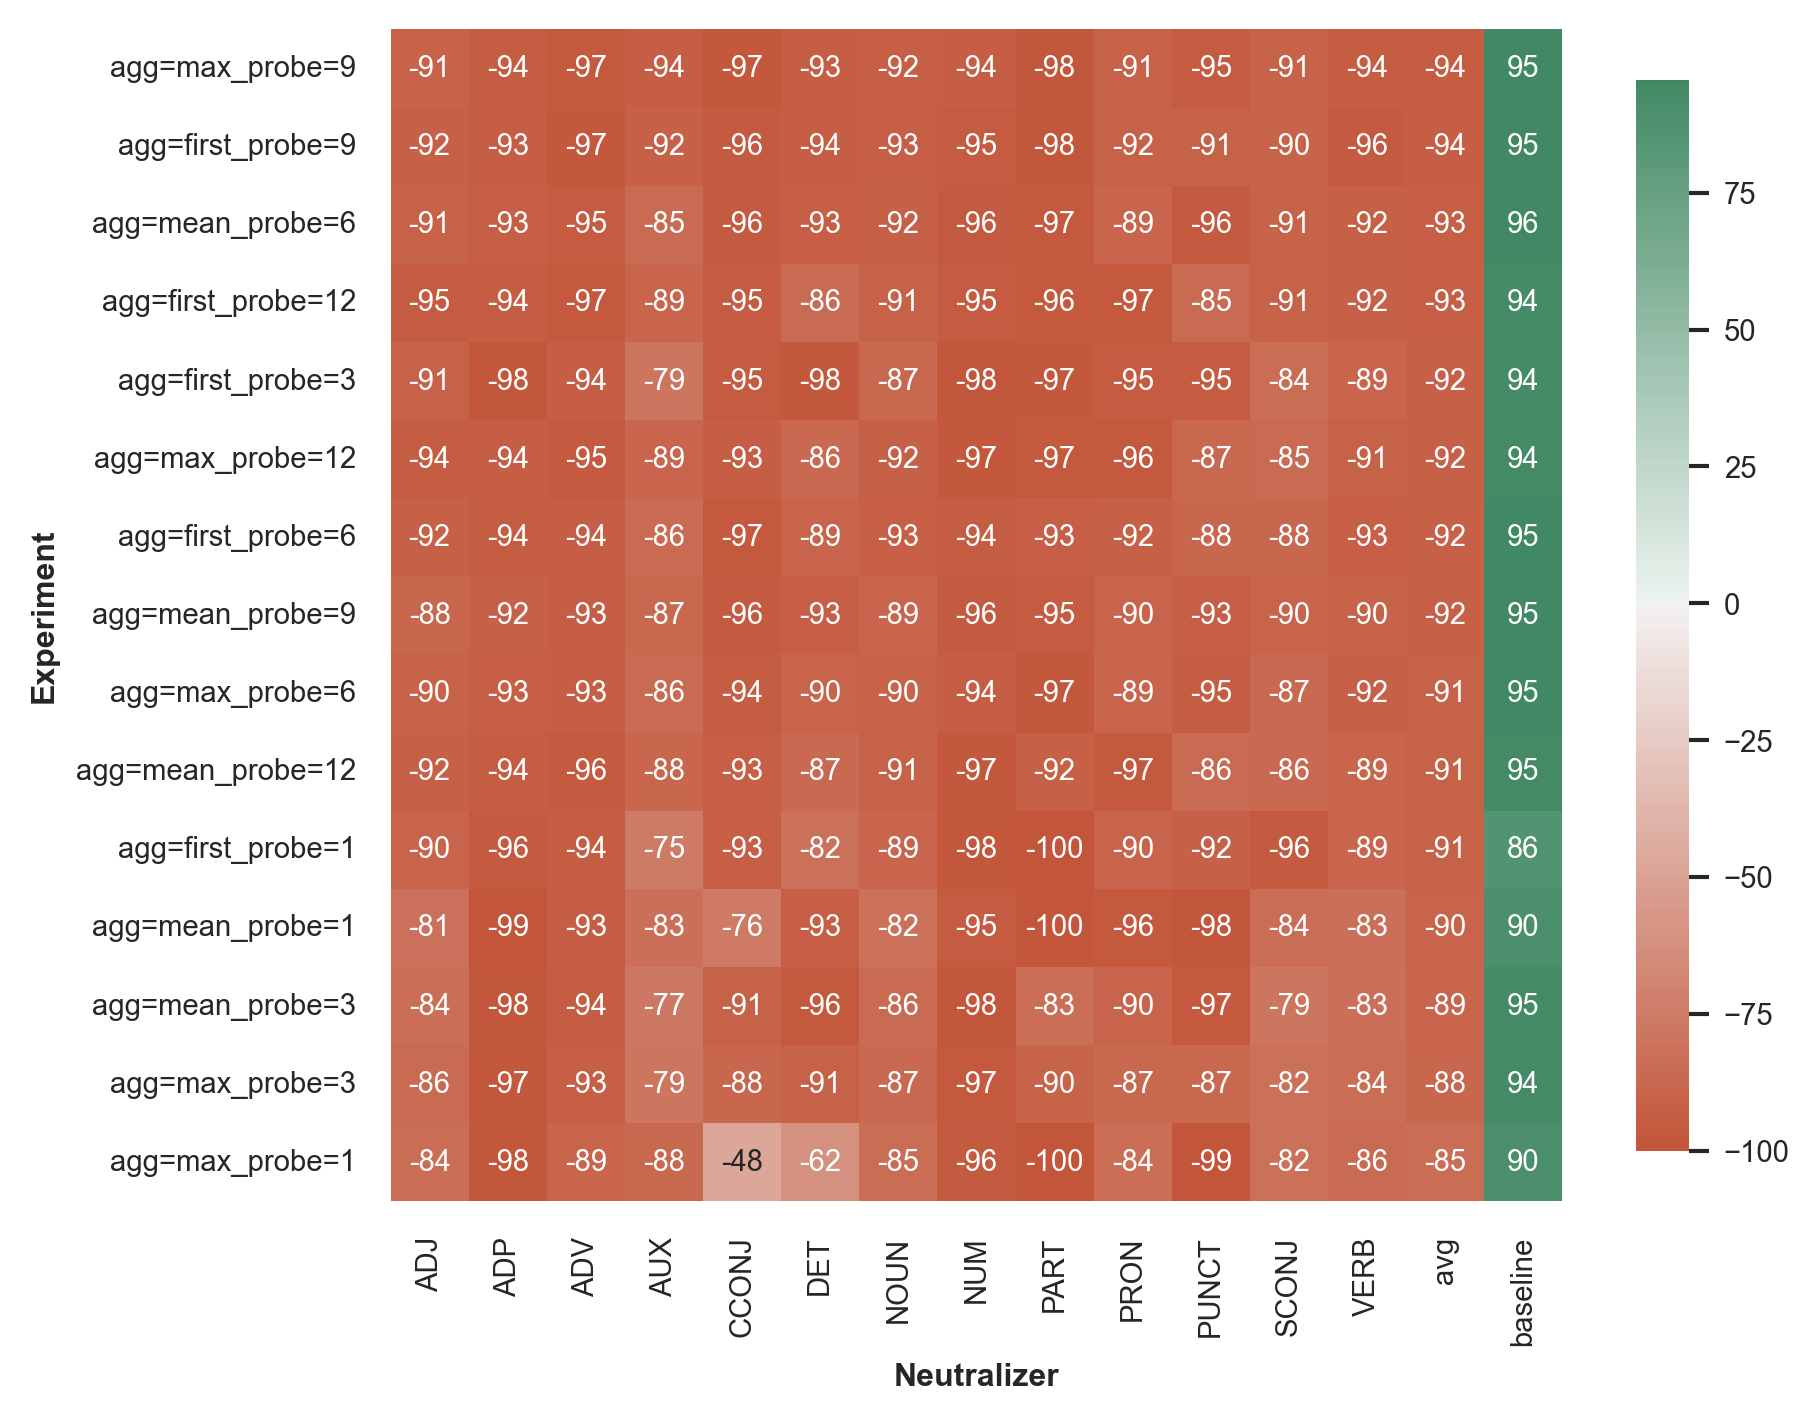

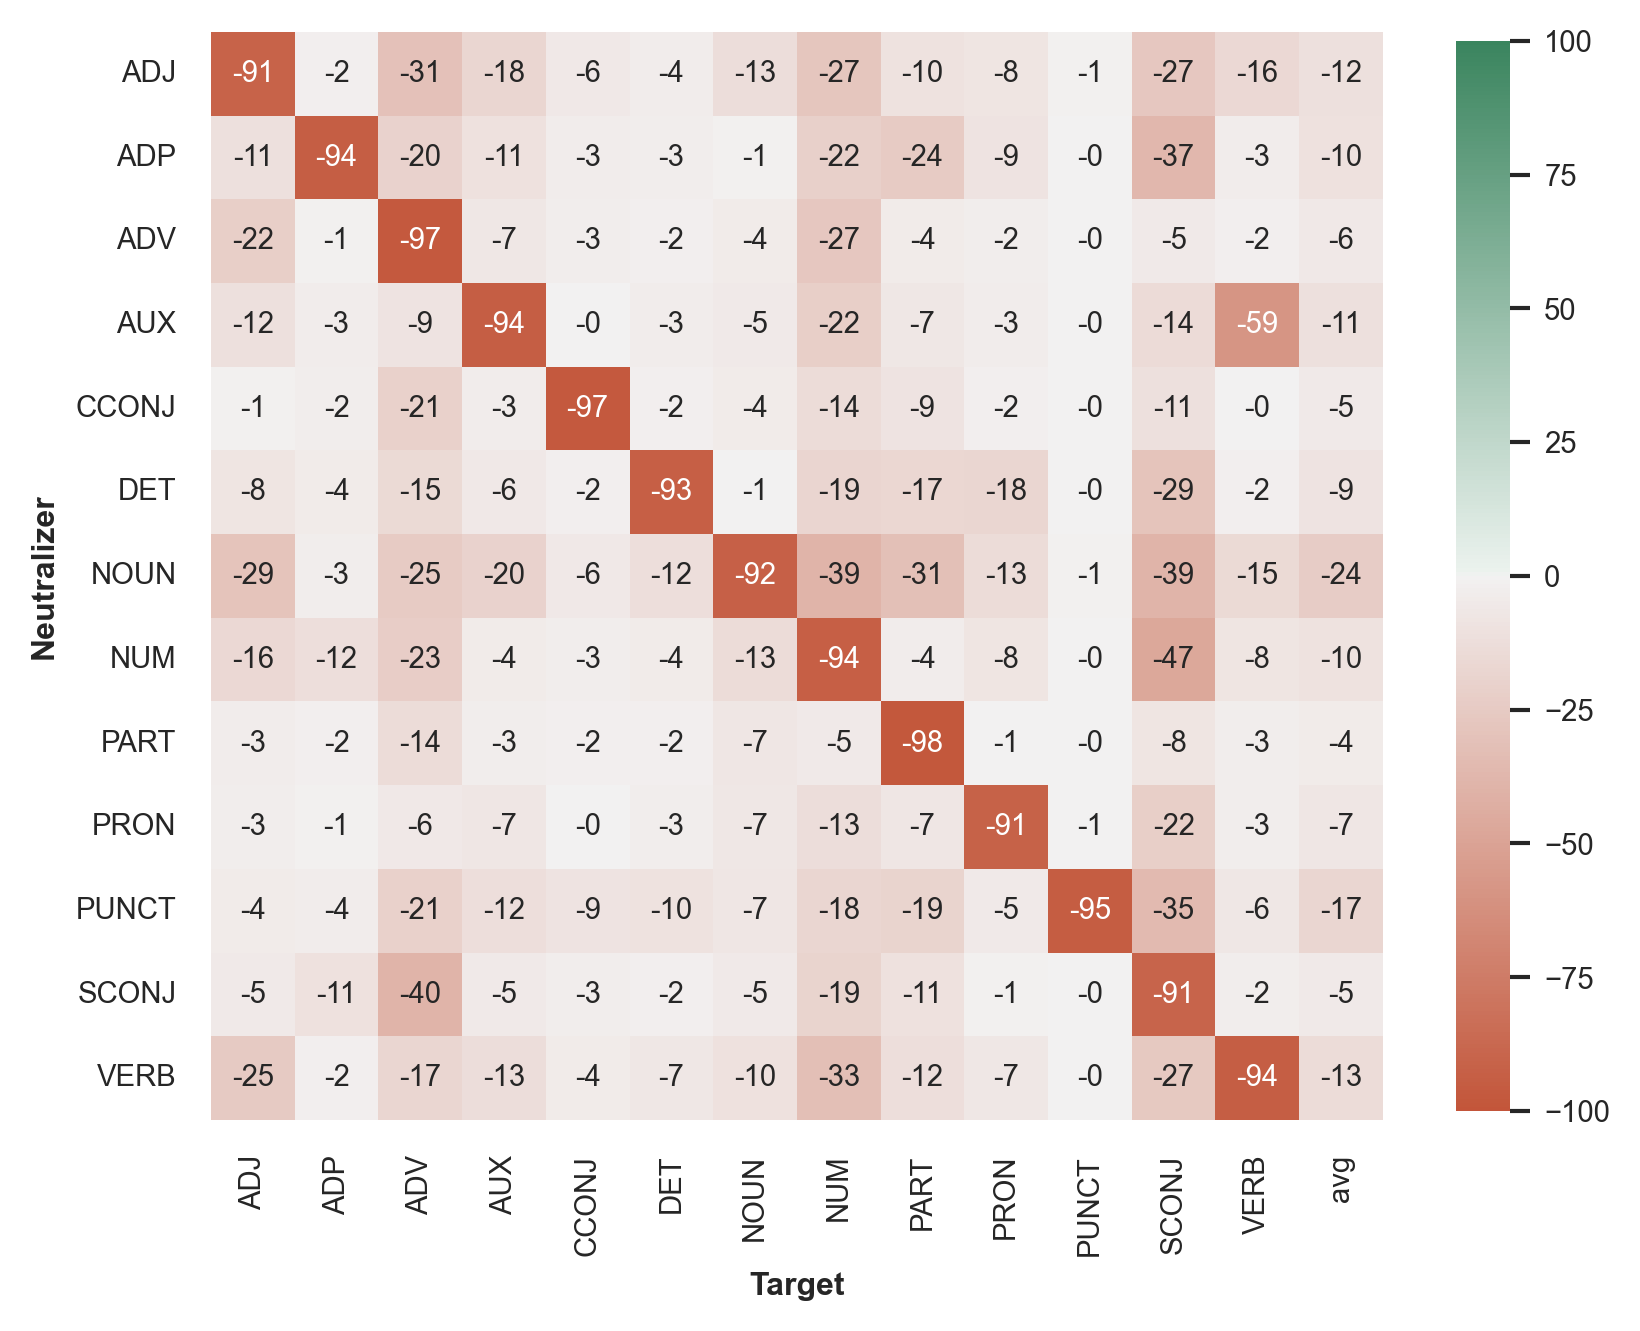

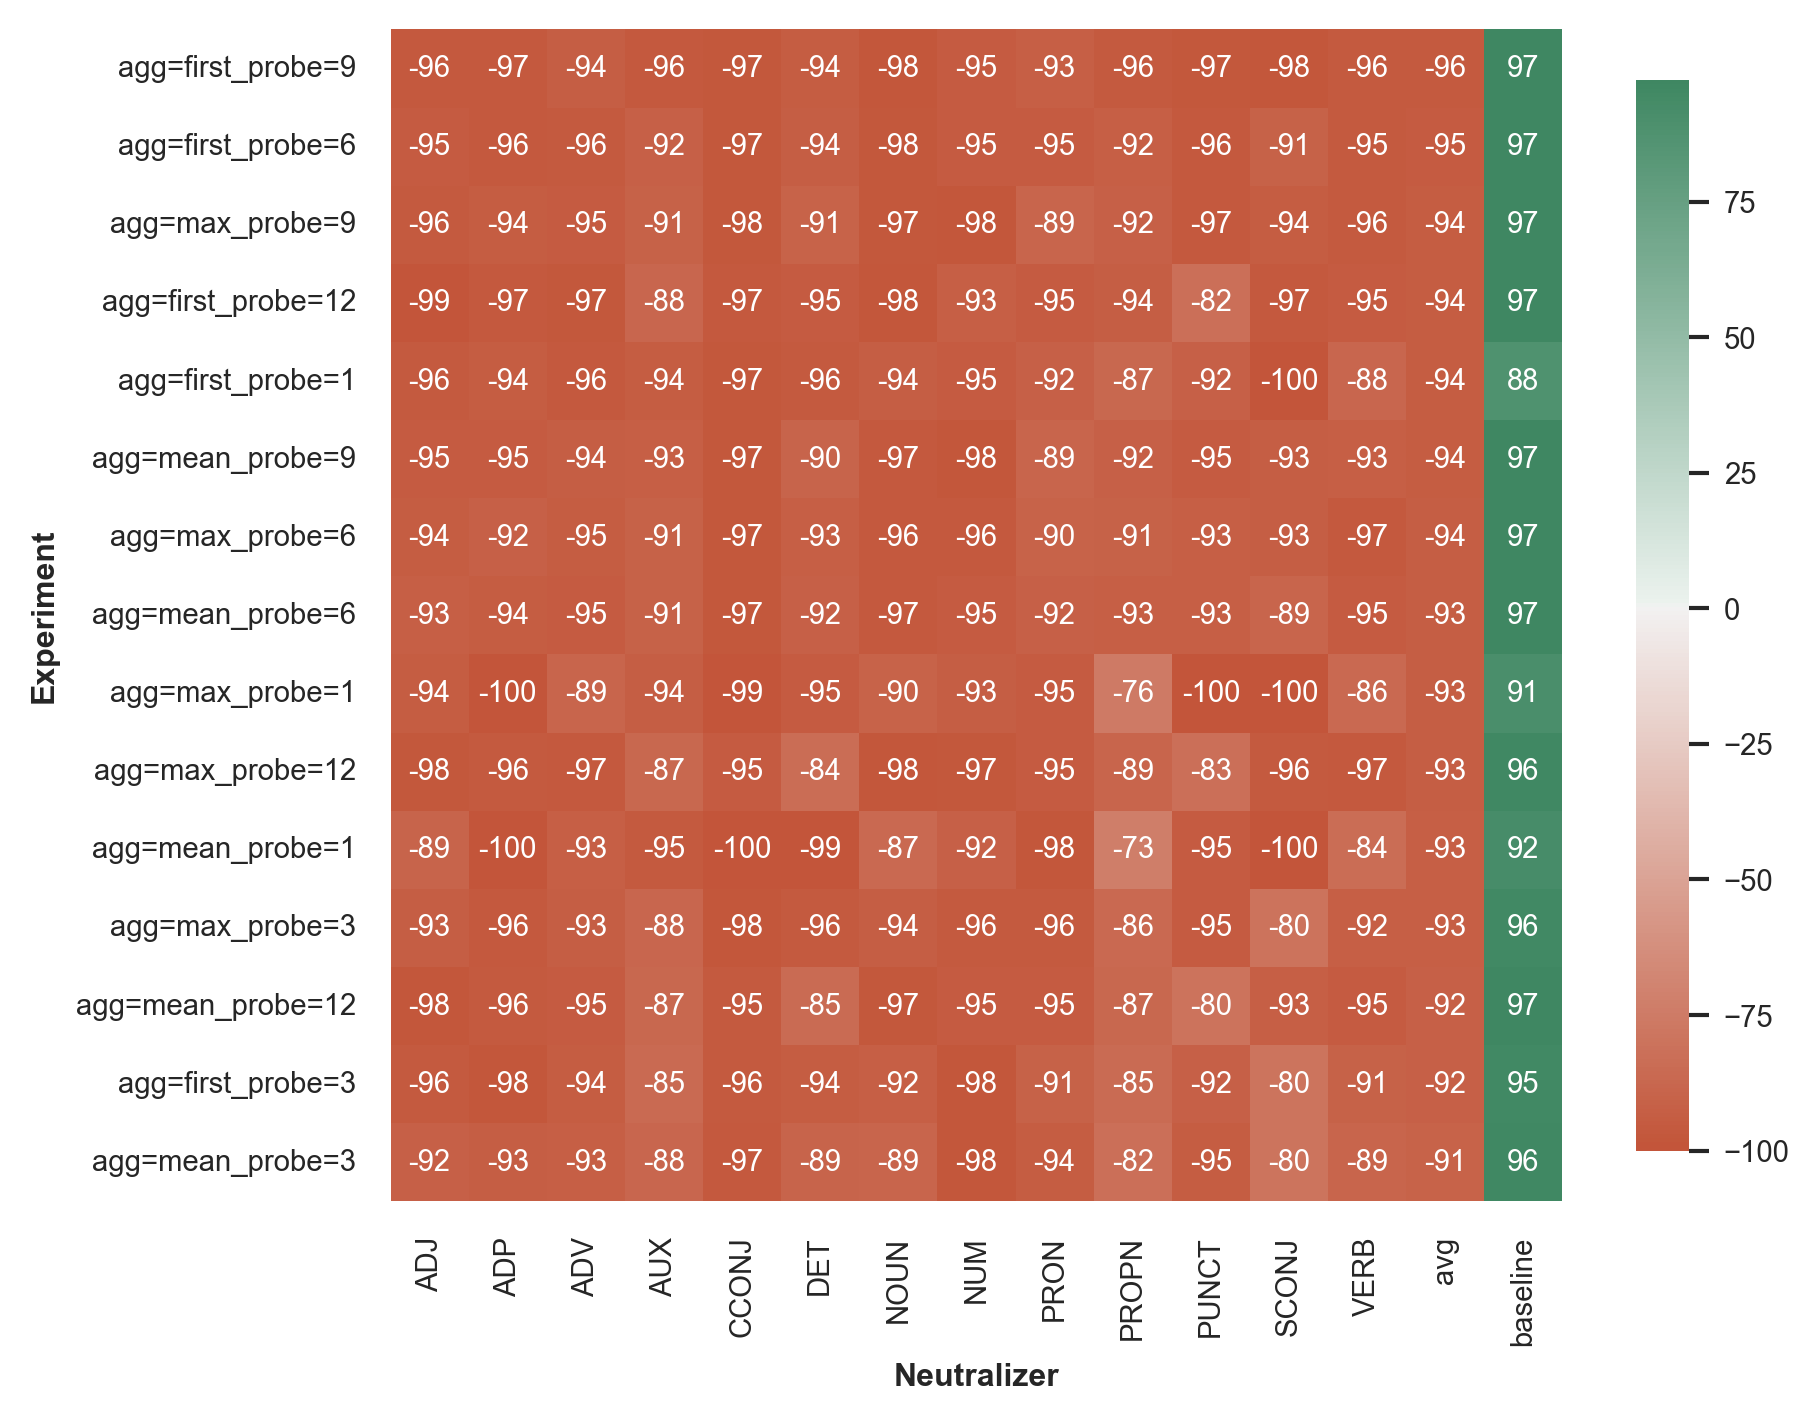

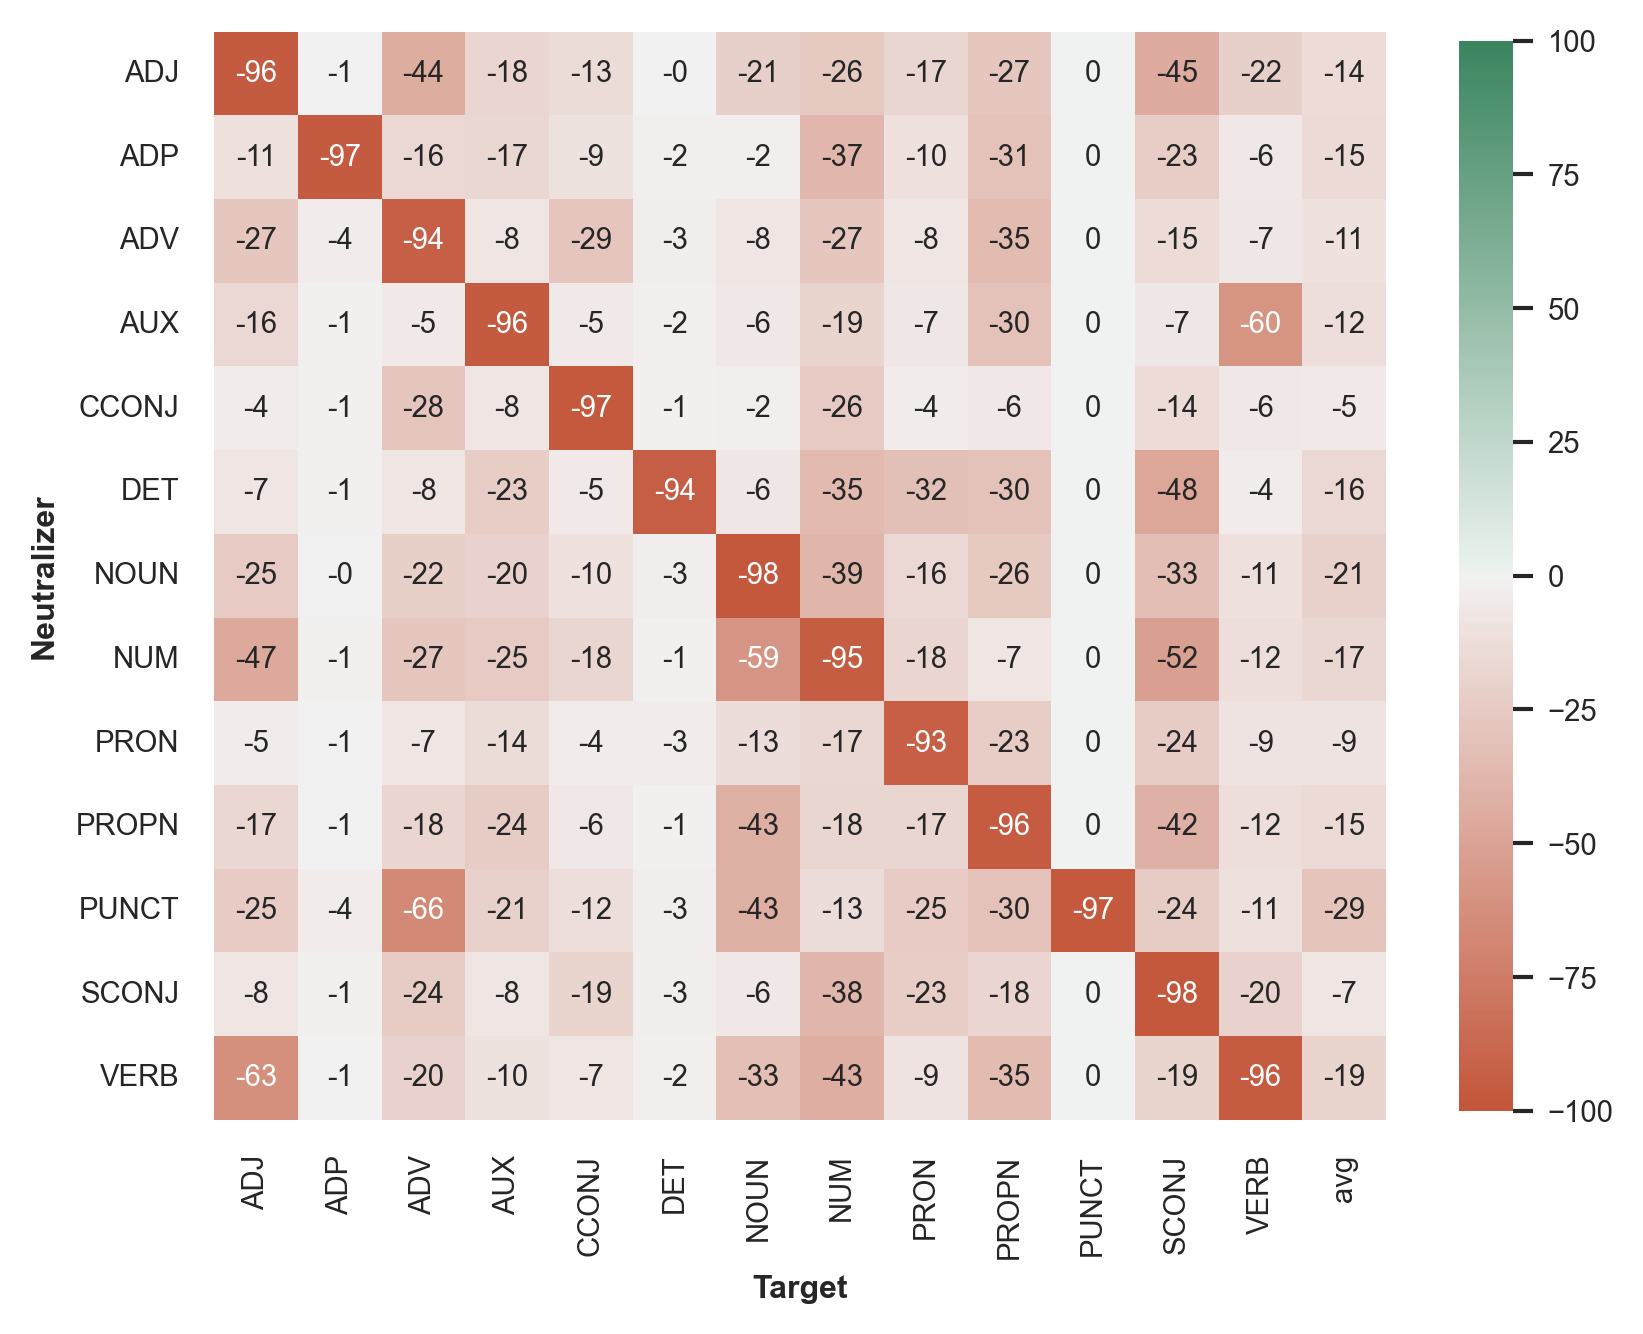

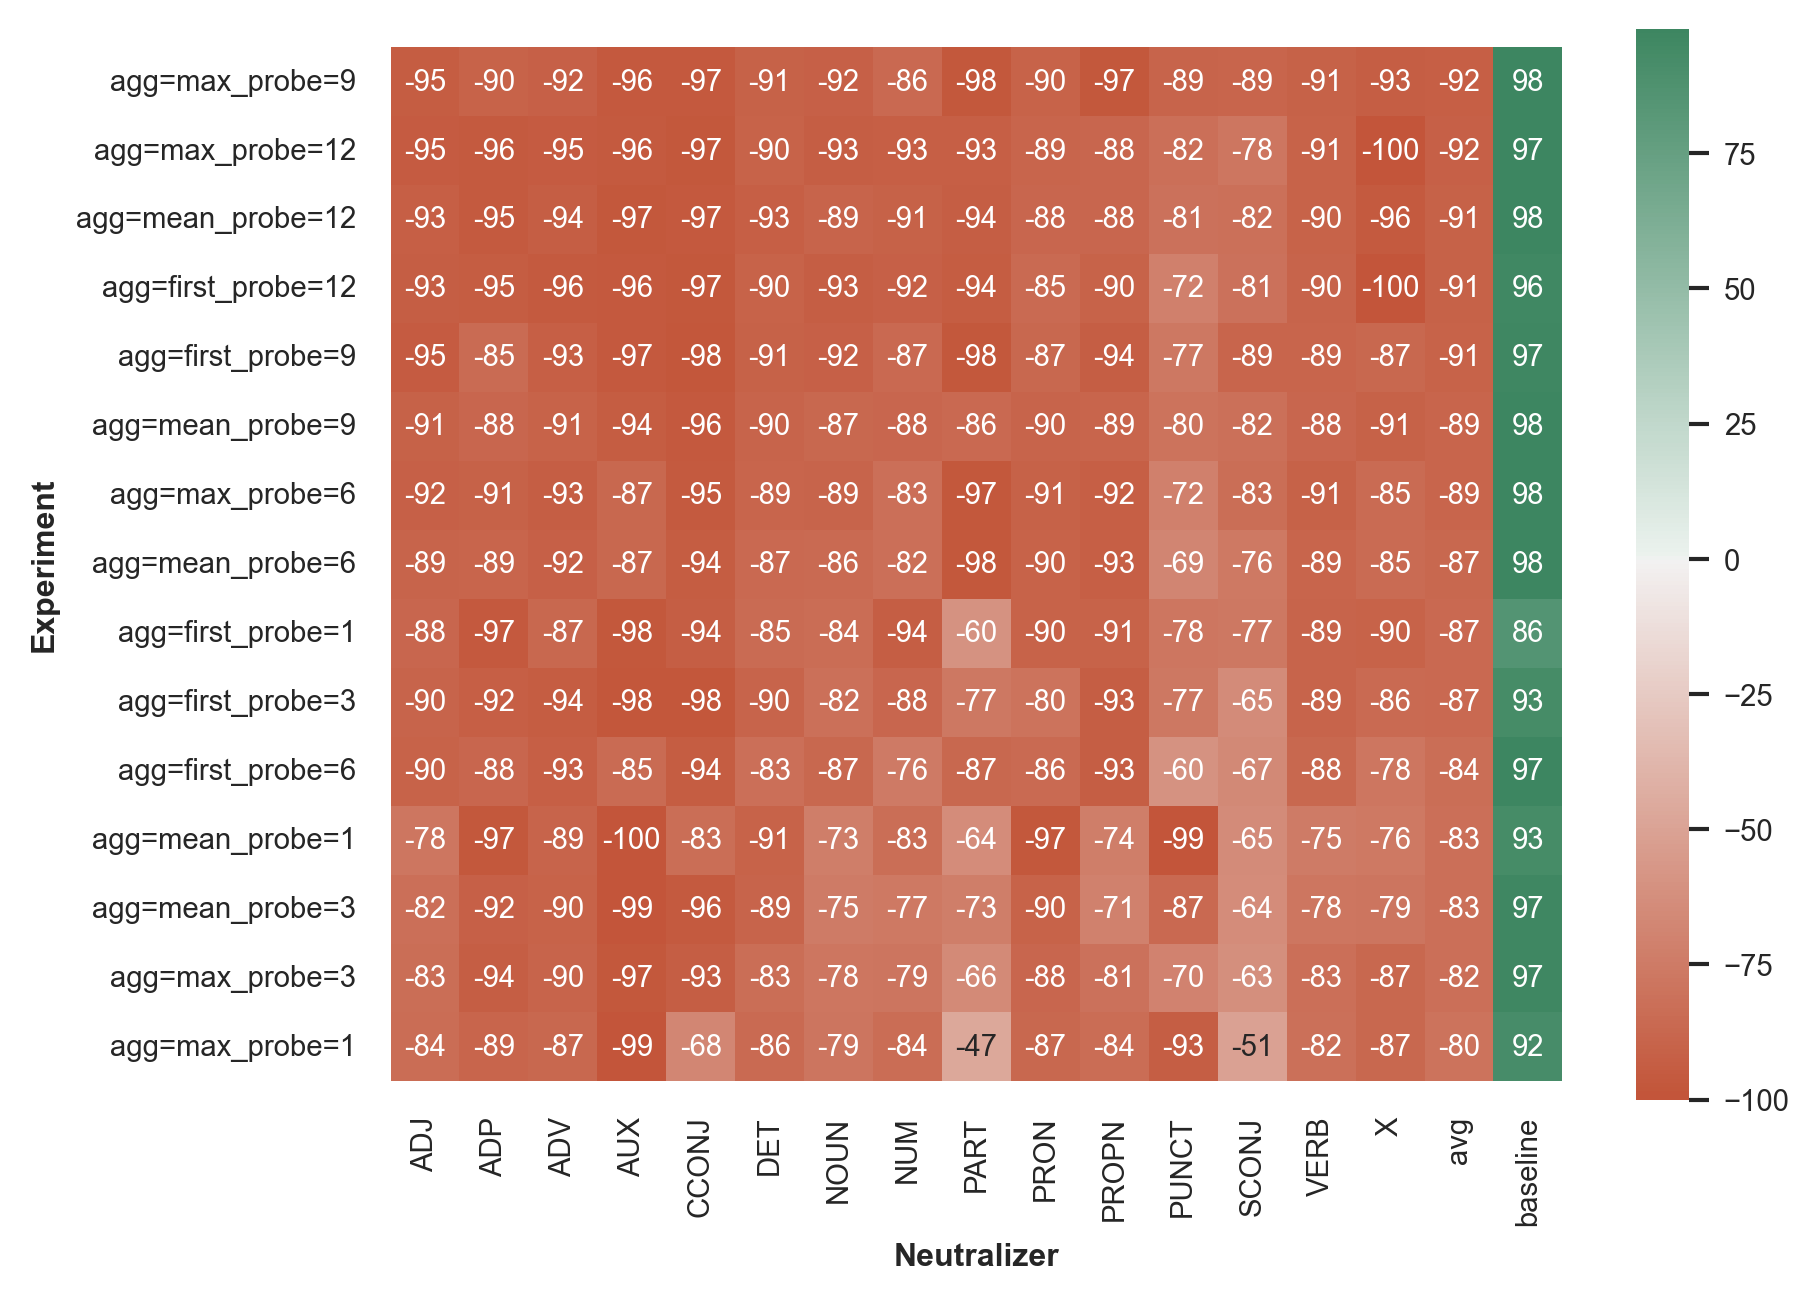

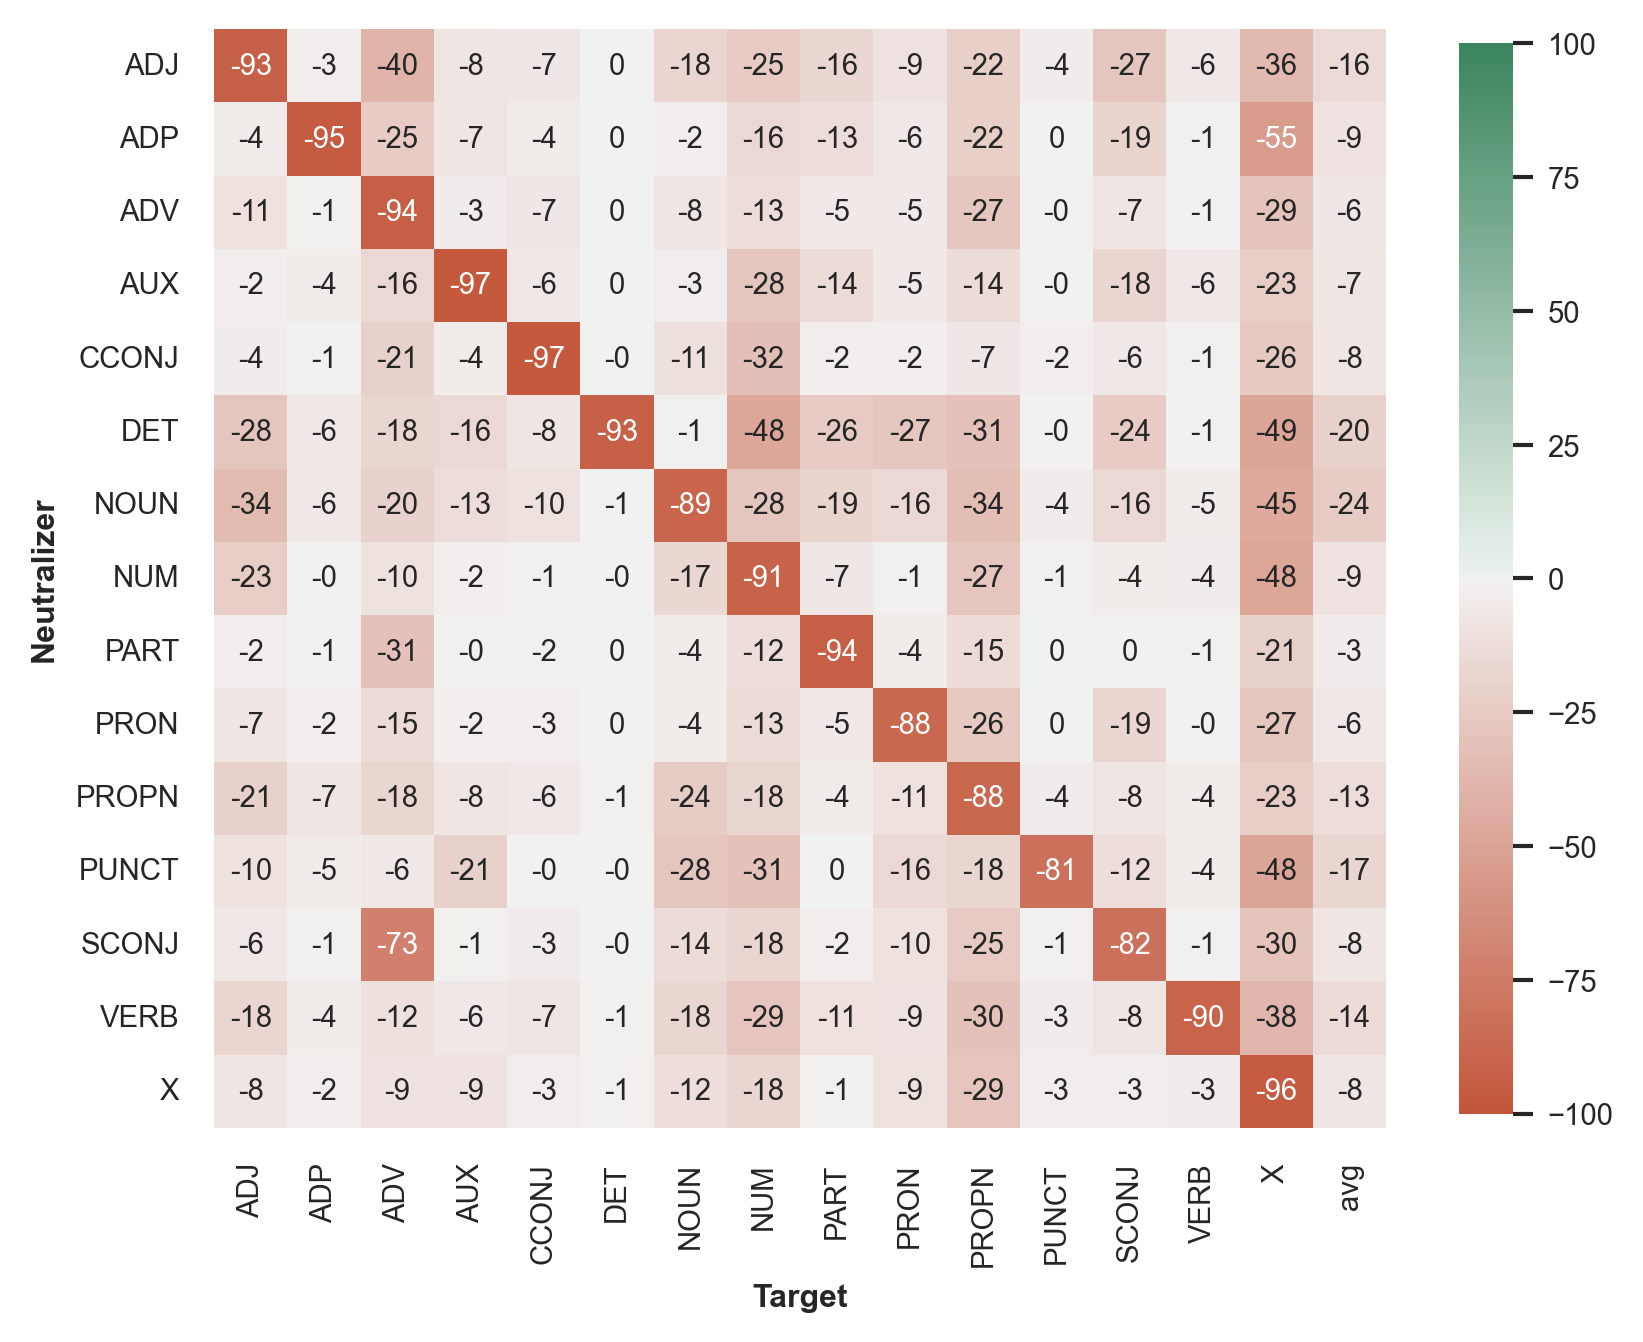

In [7]:
for TASK in TASKS:
    for MODEL in MODELS:
        for TREE_BANK in TREE_BANKS:
            print(TASK, MODEL, TREE_BANK)
            experiments_df = utils.get_experiments_df(TASK, TREE_BANK, MODEL)
            plot_heatmap(
                experiments_df,
                save_name=f"experiments/{TASK}_{MODEL}_{TREE_BANK}.eps",
            )
            MODE = utils.select_best_mode(experiments_df)
            eval_path = (
                f"lightning_logs/{MODEL}/{TREE_BANK}/{TASK}/{MODE}/evaluation"
            )
            acc_drop = utils.get_acc_drop(eval_path, KEEP_TAGS[TASK])
            plot_heatmap(
                acc_drop,
                save_name=f"experiments/{TASK}_{MODEL}_{TREE_BANK}_acc_drop_{MODE}"
                f"{'_sampled' if KEEP_TAGS[TASK] is not None else ''}"
                ".eps",
                vmin=-100,
                vmax=100,
                cbar=False if KEEP_TAGS[TASK] is not None else True,
            )